In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs) 

Text(0,0.5,'Magnitud')

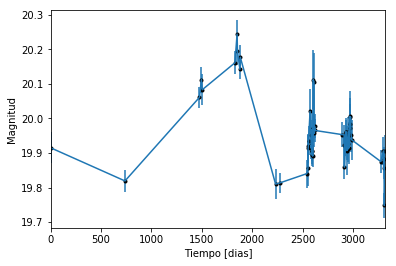

In [44]:
data = np.genfromtxt('LC_i_49159.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

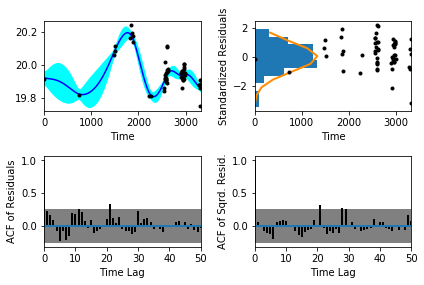

In [5]:
sample.assess_fit()

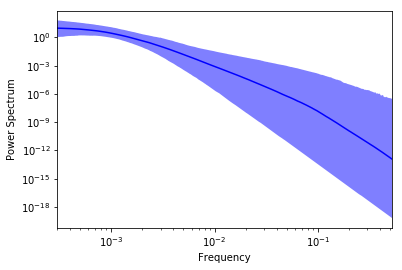

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

NameError: name 'noise_level' is not defined

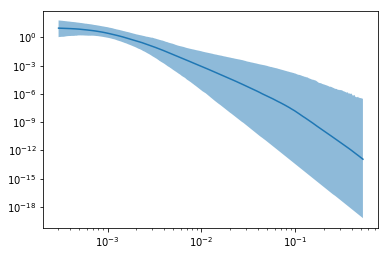

In [7]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia')
plt.xlabel('Frecuencia  [1 / dia]')
plt.annotate("Nivel de ruido", (1.25* plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

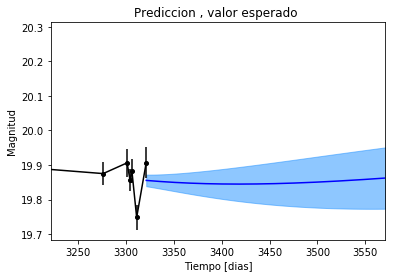

In [8]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion, Caminos simulados')

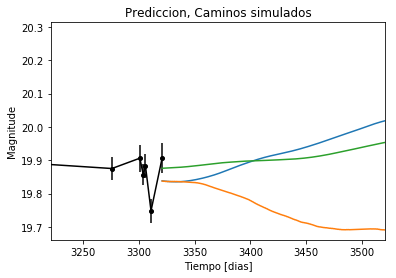

In [9]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 3
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  # use a random draw of the CARMA parameters from its posterior
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


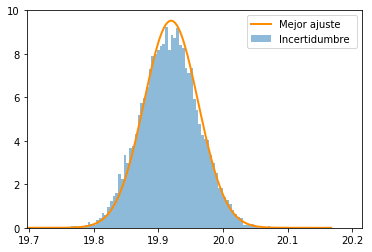

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

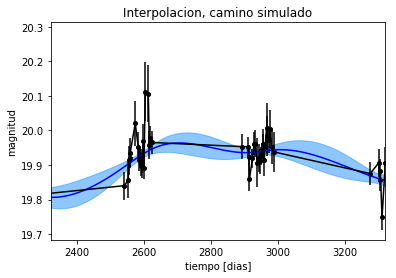

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

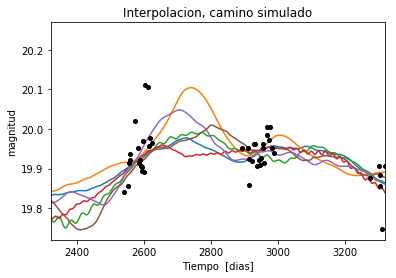

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 6
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 4)

In [15]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 882.937714331
Median: 0.00134193892344
Standard deviation: 0.24382707681
68% credibility interval: [ 0.          0.32261391]
95% credibility interval: [ 0.          0.88824099]
99% credibility interval: [ 0.          1.00405566]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 882.937714331
Median: 0.00134193892344
Standard deviation: 0.24382707681
68% credibility interval: [ 0.          0.32261391]
95% credibility interval: [ 0.          0.88824099]
99% credibility interval: [ 0.          1.00405566]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 408.5161427
Median: 0.0
Standard deviation: 0.000457197349999
68% cred

Plotting parameter summary


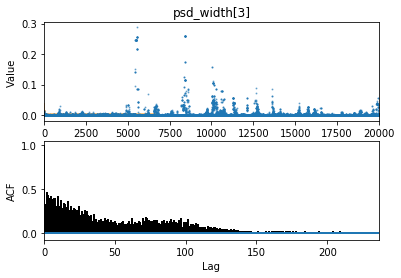

In [16]:
sample.plot_parameter('psd_width', 3, doShow=True)

In [17]:

centroid_samples = sample.get_samples('logpost')
centroid_samples.shape

(20000, 1)

In [18]:

sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1770.07890659
Median: 110.48674947
Standard deviation: 1.63773449343
68% credibility interval: [ 108.76758479  111.74558307]
95% credibility interval: [ 106.25946104  112.63306999]
99% credibility interval: [ 104.26674915  113.12665326]


In [19]:
centroid_samples = sample.get_samples('ar_coefs')
centroid_samples.shape

(20000, 5)

In [20]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 672.465279717
Median: 0.474878536675
Standard deviation: 2.04606644411
68% credibility interval: [ 0.04107199  3.40941297]
95% credibility interval: [ 0.01148664  6.9349787 ]
99% credibility interval: [  9.06952176e-03   9.85067147e+00]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 778.446555975
Median: 0.159412676433
Standard deviation: 8.68138398446
68% credibility interval: [  6.32348338e-03   7.37692842e+00]
95% credibility interv

In [21]:
centroid_samples = sample.get_samples('ma_coefs')
centroid_samples.shape

(20000, 2)

In [22]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20038.4983428
Median: 2.30112816167e-27
Standard deviation: 7.49510729268e+145
68% credibility interval: [  8.91112745e-78   1.26771247e-03]
95% credibility interval: [  9.63898669e-109   1.52990046e+072]
99% credibility interval: [  7.60602456e-114   1.83681752e+100]


In [23]:
centroid_samples = sample.get_samples('mu')
centroid_samples.shape

(20000, 1)

In [24]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2466.63318861
Median: 19.9375035757
Standard deviation: 0.0764170801004
68% credibility interval: [ 19.87367557  19.99245629]
95% credibility interval: [ 19.77278666  20.07264079]
99% credibility interval: [ 19.66417319  20.19090933]


In [25]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 4)

In [26]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 882.937714331
Median: 0.00134193892344
Standard deviation: 0.24382707681
68% credibility interval: [ 0.          0.32261391]
95% credibility interval: [ 0.          0.88824099]
99% credibility interval: [ 0.          1.00405566]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 882.937714331
Median: 0.00134193892344
Standard deviation: 0.24382707681
68% credibility interval: [ 0.          0.32261391]
95% credibility interval: [ 0.          0.88824099]
99% credibility interval: [ 0.          1.00405566]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 408.5161427
Median: 0.0
Standard deviation: 0.000457197349999
68% cred

In [27]:
centroid_samples = sample.get_samples('loglik')
centroid_samples.shape

(20000, 1)

In [28]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1770.07890659
Median: 110.48674947
Standard deviation: 1.63773449343
68% credibility interval: [ 108.76758479  111.74558307]
95% credibility interval: [ 106.25946104  112.63306999]
99% credibility interval: [ 104.26674915  113.12665326]


In [29]:
centroid_samples = sample.get_samples('psd_width')
centroid_samples.shape

(20000, 4)

In [30]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 510.504489507
Median: 0.00697373349783
Standard deviation: 0.185138943087
68% credibility interval: [ 0.0006529   0.15209221]
95% credibility interval: [  3.39575265e-04   7.28768446e-01]
99% credibility interval: [  3.08588689e-04   9.73847161e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 1411.18905857
Median: 0.00124520336519
Standard deviation: 0.0724216606452
68% credibility interval: [ 0.00046046  0.02199816]
95% credibility interval: [ 0.00032015  0.20962916]
99% credibility interval: [  3.04305493e-04   5.51227945e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 465.20925292
Median: 0.0092936814874
Standard 

In [31]:
centroid_samples = sample.get_samples('var')
centroid_samples.shape

(20000, 1)

In [32]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1351.17591831
Median: 0.0193571467881
Standard deviation: 0.0281994776431
68% credibility interval: [ 0.01103228  0.0402412 ]
95% credibility interval: [ 0.00701372  0.09223809]
99% credibility interval: [ 0.00547875  0.16543924]


In [33]:
centroid_samples = sample.get_samples('measerr_scale')
centroid_samples.shape

(20000, 1)

In [34]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2487.16696011
Median: 1.02546333334
Standard deviation: 0.157345052274
68% credibility interval: [ 0.88443276  1.18825072]
95% credibility interval: [ 0.77116378  1.38597858]
99% credibility interval: [ 0.7056419   1.52401983]


In [35]:
centroid_samples = sample.get_samples('sigma')
centroid_samples.shape

(20000, 1)

In [36]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 960.377975711
Median: 1.90472765065e-05
Standard deviation: 0.0758910763324
68% credibility interval: [  1.77086746e-07   1.58863956e-03]
95% credibility interval: [  6.72158712e-77   4.68930327e-02]
99% credibility interval: [  2.49580419e-105   4.37693820e-001]


In [37]:
centroid_samples = sample.get_samples('ar_roots')
centroid_samples.shape

(20000, 4)

In [38]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 510.504489507
Median: (-0.0438172598497-0.177003686174j)
Standard deviation: 1.9235997383
68% credibility interval: [-0.95562351-0.75330193j -0.00410226-0.00310671j]
95% credibility interval: [ -4.57898719e+00+0.j          -2.13361432e-03-0.00653632j]
99% credibility interval: [ -6.11886218e+00+0.j         -1.93891992e-03-0.1049193j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 1411.18905857
Median: (-0.00782384348864+0j)
Standard deviation: 1.59816051639
68% credibility interval: [-0.13821849+3.45068245j -0.00289318+0.50693842j]
95% credibility interval: [-1.31713887+1.29337053j -0.00201155+0.j        ]
99% credibility interval: [ -3.46346733e+00 +6.32030937e+00j  -1.91200780e-03 +8.90961098e-04j]
Posterior summary

Plotting 2d PDF w KDE


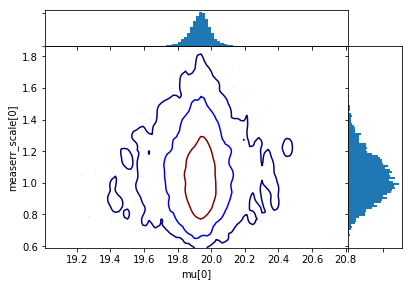

In [39]:
sample.plot_2dkde('mu', 'measerr_scale', doShow=True)

Plotting 2d PDF


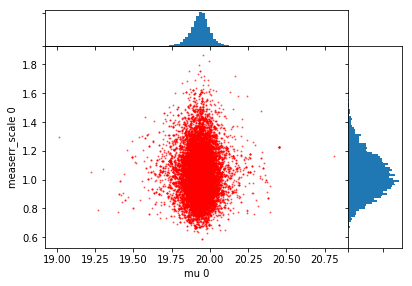

In [40]:
sample.plot_2dpdf('mu', 'measerr_scale', doShow=True)

Plotting 2d PDF


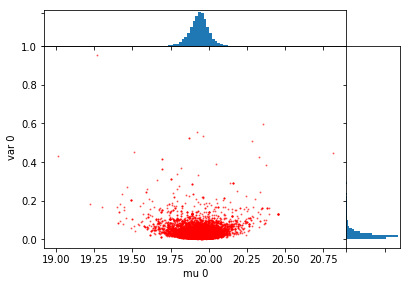

In [41]:
sample.plot_2dpdf('mu', 'var', doShow=True)

Plotting 2d PDF w KDE


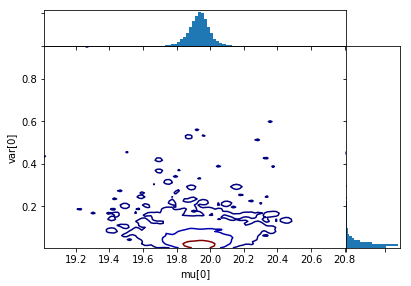

In [42]:
sample.plot_2dkde('mu', 'var', doShow=True)